<a href="https://colab.research.google.com/github/kiranbapatla/Time-Series-Yellow-Stemborer-Prediction-Light-trap/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importimg the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import math

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense # dense network
from keras.layers import LSTM, Flatten, Dropout
from sklearn.metrics import mean_squared_error # metrices
from sklearn.metrics import r2_score # r2 value
from sklearn.metrics import mean_absolute_error as mae # MAE value
from scipy import stats

In [ ]:
#importing the data file in csv format from google drive files
df = pd.read_csv('/content/drive/MyDrive/LSTM_ANN_time_series/Raw_Data_YSB.csv')

In [ ]:
df

,Date,YSB,Temp,RH,RF
0,01-09-2017,0,29.95,84.5,0.0
1,02-09-2017,0,26.95,93.0,68.0
2,03-09-2017,0,27.95,93.0,0.0
3,04-09-2017,4,30.05,73.0,0.0
4,05-09-2017,7,29.95,74.5,0.0
...,...,...,...,...,...
1698,26-04-2022,5,33.45,70.0,0.0
1699,27-04-2022,6,33.50,70.0,0.0
1700,28-04-2022,5,32.85,68.5,0.0
1701,29-04-2022,4,33.85,69.0,0.0


In [ ]:
#information about columns in the data file like data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1703 non-null   object 
 1   YSB     1703 non-null   int64  
 2   Temp    1703 non-null   float64
 3   RH      1703 non-null   float64
 4   RF      1703 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 66.6+ KB


In [ ]:
#Formating the Date column to date, month and year format
df ['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

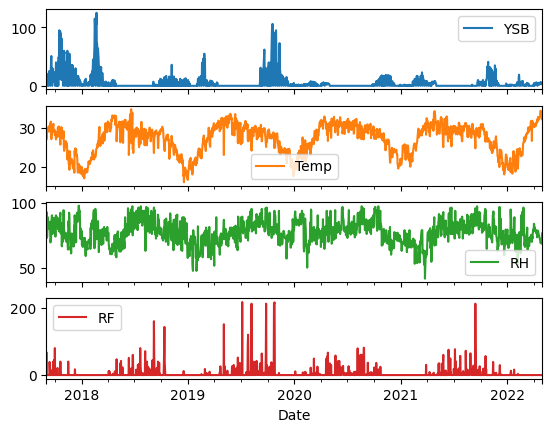

In [ ]:
#Indexing the Date column for plotting
df.set_index('Date')[['YSB','Temp','RH','RF']].plot(subplots=True)

In [ ]:
#information of data frame
df

,Date,YSB,Temp,RH,RF
0,2017-09-01,0,29.95,84.5,0.0
1,2017-09-02,0,26.95,93.0,68.0
2,2017-09-03,0,27.95,93.0,0.0
3,2017-09-04,4,30.05,73.0,0.0
4,2017-09-05,7,29.95,74.5,0.0
...,...,...,...,...,...
1698,2022-04-26,5,33.45,70.0,0.0
1699,2022-04-27,6,33.50,70.0,0.0
1700,2022-04-28,5,32.85,68.5,0.0
1701,2022-04-29,4,33.85,69.0,0.0


In [ ]:
# Indexing the date column
df.set_index('Date', inplace = True)

In [ ]:
# Information of data frame
df

,YSB,Temp,RH,RF
Date,,,,
2017-09-01,0,29.95,84.5,0.0
2017-09-02,0,26.95,93.0,68.0
2017-09-03,0,27.95,93.0,0.0
2017-09-04,4,30.05,73.0,0.0
2017-09-05,7,29.95,74.5,0.0
...,...,...,...,...
2022-04-26,5,33.45,70.0,0.0
2022-04-27,6,33.50,70.0,0.0
2022-04-28,5,32.85,68.5,0.0


In [ ]:
# reversing the indexing of date column
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1703 non-null   datetime64[ns]
 1   YSB     1703 non-null   int64         
 2   Temp    1703 non-null   float64       
 3   RH      1703 non-null   float64       
 4   RF      1703 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 66.6 KB


In [ ]:
# printing the information about the data frame
print ("Rows     : " , df.shape[0])
print ("Columns   : ", df.shape[1])
print ("\nFeatures :\n" , df.columns.tolist())
print ("\nMissing values :  " , df.isnull().any())
print ("\nUnique values : \n", df.nunique())

Rows     :  1703
Columns   :  4

Features :
 ['YSB', 'Temp', 'RH', 'RF']

Missing values :   YSB     False
Temp    False
RH      False
RF      False
dtype: bool

Unique values : 
 YSB      73
Temp    317
RH      105
RF      145
dtype: int64


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

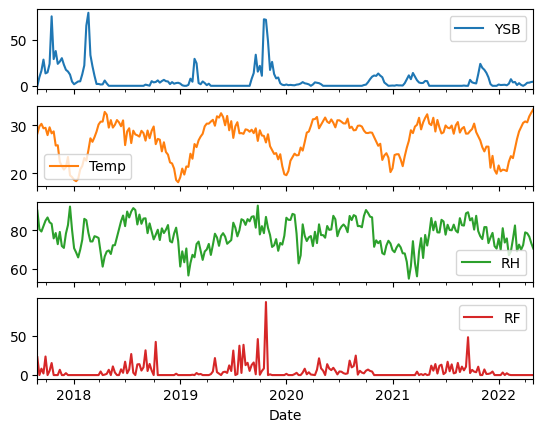

In [ ]:
# plotting the weekly means
df.resample('W').mean().plot(subplots=True)

In [ ]:
#removing the index from df
n_df=df.reset_index()

In [ ]:
n_df

,Date,YSB,Temp,RH,RF
0,2017-09-01,0,29.95,84.5,0.0
1,2017-09-02,0,26.95,93.0,68.0
2,2017-09-03,0,27.95,93.0,0.0
3,2017-09-04,4,30.05,73.0,0.0
4,2017-09-05,7,29.95,74.5,0.0
...,...,...,...,...,...
1698,2022-04-26,5,33.45,70.0,0.0
1699,2022-04-27,6,33.50,70.0,0.0
1700,2022-04-28,5,32.85,68.5,0.0
1701,2022-04-29,4,33.85,69.0,0.0


In [ ]:
print ("Rows     : " , n_df.shape[0])
print ("Columns   : ", n_df.shape[1])
print ("\nFeatures :\n" , n_df.columns.tolist())
print ("\nMissing values :  " , n_df.isnull().any())
print ("\nUnique values : \n", n_df.nunique())

Rows     :  1703
Columns   :  5

Features :
 ['Date', 'YSB', 'Temp', 'RH', 'RF']

Missing values :   Date    False
YSB     False
Temp    False
RH      False
RF      False
dtype: bool

Unique values : 
 Date    1703
YSB       73
Temp     317
RH       105
RF       145
dtype: int64


In [ ]:
#defining the new data frame as df_input
df_input=n_df[['YSB','Temp','RH','RF']]
df_input

,YSB,Temp,RH,RF
0,0,29.95,84.5,0.0
1,0,26.95,93.0,68.0
2,0,27.95,93.0,0.0
3,4,30.05,73.0,0.0
4,7,29.95,74.5,0.0
...,...,...,...,...
1698,5,33.45,70.0,0.0
1699,6,33.50,70.0,0.0
1700,5,32.85,68.5,0.0
1701,4,33.85,69.0,0.0


In [ ]:
# descriptive statistics of df
df_input.describe()

,YSB,Temp,RH,RF
count,1703.000000,1703.000000,1703.000000,1703.000000
mean,6.342337,27.084204,77.433412,4.860752
std,14.889673,3.853444,9.078416,18.879918
min,0.000000,16.000000,41.500000,0.000000
25%,0.000000,24.300000,71.500000,0.000000
50%,0.000000,28.100000,77.500000,0.000000
75%,6.000000,30.050000,83.500000,0.000000
max,125.000000,34.750000,98.000000,217.000000


In [ ]:
#Normalize the data/Scaling the data from 0 to 1
scaler = MinMaxScaler()
data_scaled =scaler.fit_transform(df_input)

In [ ]:
# info about scaled data
data_scaled

array([[0.        , 0.744     , 0.76106195, 0.        ],
       [0.        , 0.584     , 0.91150442, 0.31336406],
       [0.        , 0.63733333, 0.91150442, 0.        ],
       ...,
       [0.04      , 0.89866667, 0.47787611, 0.        ],
       [0.032     , 0.952     , 0.48672566, 0.        ],
       [0.024     , 0.864     , 0.61946903, 0.        ]])

In [ ]:
# defining the input and output
features = data_scaled
target = data_scaled[:,0]

In [ ]:
# Generating the sequential time series with length of 1 day
TimeseriesGenerator(features, target, length = 1, sampling_rate = 1, batch_size=1)[0]

(array([[[0.        , 0.744     , 0.76106195, 0.        ]]]), array([0.]))

In [ ]:
# Splitting the input and output data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 123, shuffle = False)

In [ ]:
#input shape of training data after splitting
x_train.shape

(1192, 4)

In [ ]:
#input shape of testing data after splitting
x_test.shape

(511, 4)

In [ ]:
# traing and testing data generation
win_length = 1 # 1 day
batch_size = 32
num_features = 4 # 4 features(YSB, Temp, RH, RF)
train_generator = TimeseriesGenerator(x_train, y_train, length = win_length, sampling_rate = 1, batch_size = batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length = win_length, sampling_rate = 1, batch_size = batch_size)

In [ ]:
# LSTM model topology
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50,input_shape=(win_length, num_features), return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(50, return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(25, return_sequences = False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [ ]:
# model = Sequential()
# model.add(LSTM(64, activation = 'sigmoid', input_shape = (win_length, num_features)))
# model.add(Dense(32))
# model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#summary of model (no. of nodes in each hidden layer and output layer)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 50)             11000     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 1, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 1, 50)             20200     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 1, 50)             0         
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_8 (LSTM)               (None, 25)                7600      
                                                                 
 dropout_5 (Dropout)         (None, 25)               

In [ ]:
# model fitting
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
 #                                                 patience = 2,
 #                                                 mode = 'min')
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer = tf.optimizers.Adam(),
              metrics = [tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False)
#                              callbacks=[early_stopping])


Epoch 1/50


<ipython-input-113-e383c72d4c62>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 50,


38/38 [==============================] - 8s 55ms/step - loss: 0.0210 - mean_absolute_error: 0.0729 - val_loss: 0.0028 - val_mean_absolute_error: 0.0405
Epoch 2/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0193 - mean_absolute_error: 0.0815 - val_loss: 0.0032 - val_mean_absolute_error: 0.0469
Epoch 3/50
38/38 [==============================] - 0s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0829 - val_loss: 0.0032 - val_mean_absolute_error: 0.0466
Epoch 4/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0188 - mean_absolute_error: 0.0822 - val_loss: 0.0031 - val_mean_absolute_error: 0.0460
Epoch 5/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0183 - mean_absolute_error: 0.0815 - val_loss: 0.0029 - val_mean_absolute_error: 0.0441
Epoch 6/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0173 - mean_absolute_error: 0.0793 - val_loss: 0.0025 - val_mean_absolute_error: 0.0391
Epoch 7/50
38/38 [====================

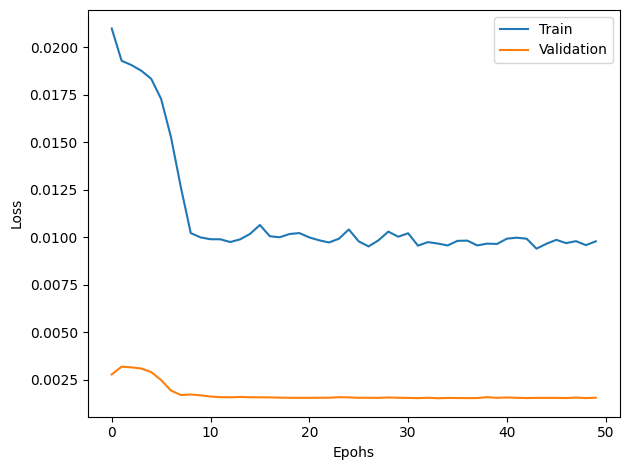

In [ ]:
# Model training and validation Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epohs')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.tight_layout()
#plt.savefig('LSTM_model_loss.pdf', dpi=300)
plt.show()

In [ ]:
#model evaluation
model.evaluate_generator(train_generator, verbose = 0)
model.evaluate_generator(test_generator, verbose = 0)

<ipython-input-115-d041f2dfc28d>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator, verbose = 0)
<ipython-input-115-d041f2dfc28d>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose = 0)


[0.0015518188010901213, 0.025171227753162384]

In [ ]:
# prediction of training and testing data
predictions_train = model.predict_generator(train_generator)
predictions_test = model.predict_generator(test_generator)

<ipython-input-116-fc2d809f150a>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_train = model.predict_generator(train_generator)
<ipython-input-116-fc2d809f150a>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_test = model.predict_generator(test_generator)


In [ ]:
#shape of prediction train and test
predictions_train.shape[0], predictions_test.shape[0]

(1191, 510)

In [ ]:
# array of train and test predictions
predictions_train, predictions_test

(array([[0.01219886],
        [0.01448633],
        [0.0179008 ],
        ...,
        [0.04757299],
        [0.03967606],
        [0.03476487]], dtype=float32),
 array([[0.02239168],
        [0.03559929],
        [0.032579  ],
        [0.03156872],
        [0.02488913],
        [0.02296935],
        [0.0230128 ],
        [0.02292298],
        [0.02311673],
        [0.02272986],
        [0.02194615],
        [0.02368442],
        [0.02383249],
        [0.0239576 ],
        [0.02711411],
        [0.02786603],
        [0.02808801],
        [0.02808805],
        [0.02677062],
        [0.02726951],
        [0.0297574 ],
        [0.02751408],
        [0.02737537],
        [0.03145249],
        [0.02516408],
        [0.02578794],
        [0.0270673 ],
        [0.02656274],
        [0.02555506],
        [0.02504181],
        [0.02800496],
        [0.02252475],
        [0.01968208],
        [0.02128169],
        [0.02077357],
        [0.02103381],
        [0.01949361],
        [0.02622208],
  

In [ ]:
predictions_train.shape

(1191, 1)

In [ ]:
#array of training and testing output data
y_train, y_test

(array([0.   , 0.   , 0.   , ..., 0.048, 0.032, 0.   ]),
 array([0.   , 0.04 , 0.032, 0.024, 0.008, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.008, 0.   , 0.   , 0.016, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.016, 0.016, 0.   , 0.   , 0.008, 0.   , 0.008, 0.008,
        0.   , 0.   , 0.008, 0.   , 0.   , 0.   , 0.   , 0.008, 0.   ,
        0.016, 0.   , 0.   , 0.008, 0.   , 0.   , 0.   , 0.008, 0.   ,
        0.   , 0.   , 0.   , 0.056, 0.04 , 0.064, 0.   , 0.   , 0.056,
        0.072, 0.096, 0.064, 0.04 , 0.072, 0.   , 0.096, 0.096, 0.136,
        0.072, 0.136, 0.096, 0.   , 0.   , 0.072, 0.072, 0.04 , 0.056,
        0.064, 0.096, 0.   , 0.136, 0.12 , 0.08 , 0.104, 0.152, 0.184,
        0.   , 0.12 , 0.136, 0.096, 0.072, 0.064, 0.064, 0.   , 0.072,
        0.064, 0.056, 0.04 , 0.04 , 0.064, 0.   , 0.04 , 0.064, 0.024,
        0.024, 0.008

In [ ]:
#array of training and testing input data
x_train, x_test

(array([[0.        , 0.744     , 0.76106195, 0.        ],
        [0.        , 0.584     , 0.91150442, 0.31336406],
        [0.        , 0.63733333, 0.91150442, 0.        ],
        ...,
        [0.048     , 0.41066667, 0.43362832, 0.        ],
        [0.032     , 0.4       , 0.52212389, 0.        ],
        [0.        , 0.40533333, 0.46017699, 0.        ]]),
 array([[0.        , 0.4       , 0.43362832, 0.        ],
        [0.04      , 0.45066667, 0.4159292 , 0.        ],
        [0.032     , 0.45333333, 0.4159292 , 0.        ],
        ...,
        [0.04      , 0.89866667, 0.47787611, 0.        ],
        [0.032     , 0.952     , 0.48672566, 0.        ],
        [0.024     , 0.864     , 0.61946903, 0.        ]]))

In [ ]:
# Slicing the output column from the train and test data
x_train[:,1:][win_length:], x_test[:,1:][win_length:]

(array([[0.584     , 0.91150442, 0.31336406],
        [0.63733333, 0.91150442, 0.        ],
        [0.74933333, 0.55752212, 0.        ],
        ...,
        [0.41066667, 0.43362832, 0.        ],
        [0.4       , 0.52212389, 0.        ],
        [0.40533333, 0.46017699, 0.        ]]),
 array([[0.45066667, 0.4159292 , 0.        ],
        [0.45333333, 0.4159292 , 0.        ],
        [0.44      , 0.63716814, 0.        ],
        ...,
        [0.89866667, 0.47787611, 0.        ],
        [0.952     , 0.48672566, 0.        ],
        [0.864     , 0.61946903, 0.        ]]))

In [ ]:
# concatinating/appending the predicted and train/test dataframes into one dataframe
df_train_pred = pd.concat([pd.DataFrame(predictions_train), pd.DataFrame(x_train[:,1:][win_length:])], axis = 1)
df_test_pred = pd.concat([pd.DataFrame(predictions_test), pd.DataFrame(x_test[:,1:][win_length:])], axis = 1)

In [ ]:
# inversing the normalized values of predicted and train/test dataframes
rev_trans_train = scaler.inverse_transform(df_train_pred)
rev_trans_test = scaler.inverse_transform(df_test_pred)

In [ ]:
rev_trans_train, rev_trans_test

(array([[ 1.52485748, 26.95      , 93.        , 68.        ],
        [ 1.81079167, 27.95      , 93.        ,  0.        ],
        [ 2.23760027, 30.05      , 73.        ,  0.        ],
        ...,
        [ 5.94662316, 23.7       , 66.        ,  0.        ],
        [ 4.95950691, 23.5       , 71.        ,  0.        ],
        [ 4.34560888, 23.6       , 67.5       ,  0.        ]]),
 array([[ 2.79896054, 24.45      , 65.        ,  0.        ],
        [ 4.44991142, 24.5       , 65.        ,  0.        ],
        [ 4.07237513, 24.25      , 77.5       ,  0.        ],
        ...,
        [ 2.90796394, 32.85      , 68.5       ,  0.        ],
        [ 2.569834  , 33.85      , 69.        ,  0.        ],
        [ 1.82433985, 32.2       , 76.5       ,  0.        ]]))

In [ ]:
# Slicing the shape of train and test data frames based on prediction shapes
df_train_final = df_input[:predictions_train.shape[0]]
df_test_final = df_input[predictions_test.shape[0]*-1:]

In [ ]:
df_train_final.count(), df_test_final.count()

(YSB     1191
 Temp    1191
 RH      1191
 RF      1191
 dtype: int64,
 YSB     510
 Temp    510
 RH      510
 RF      510
 dtype: int64)

In [ ]:
# Appending the predicted column to the train and test dataframe
df_train_final['YSB_Pred'] = rev_trans_train[:,0]
df_test_final['YSB_Pred'] = rev_trans_test[:,0]

<ipython-input-128-c3d1afb2694d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_final['YSB_Pred'] = rev_trans_train[:,0]
<ipython-input-128-c3d1afb2694d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final['YSB_Pred'] = rev_trans_test[:,0]


In [ ]:
df_train_final

,YSB,Temp,RH,RF,YSB_Pred
0,0,29.95,84.5,0.0,1.524857
1,0,26.95,93.0,68.0,1.810792
2,0,27.95,93.0,0.0,2.237600
3,4,30.05,73.0,0.0,2.906292
4,7,29.95,74.5,0.0,4.198166
...,...,...,...,...,...
1186,0,24.55,69.0,0.0,2.649672
1187,7,24.85,64.0,0.0,5.136981
1188,8,22.40,69.0,0.0,5.946623
1189,6,23.70,66.0,0.0,4.959507


In [ ]:
df_test_final

,YSB,Temp,RH,RF,YSB_Pred
1193,5,24.45,65.0,0.0,2.798961
1194,4,24.50,65.0,0.0,4.449911
1195,3,24.25,77.5,0.0,4.072375
1196,1,24.40,72.0,0.0,3.946090
1197,0,23.90,75.0,0.0,3.111141
...,...,...,...,...,...
1698,5,33.45,70.0,0.0,1.718406
1699,6,33.50,70.0,0.0,2.413585
1700,5,32.85,68.5,0.0,2.907964
1701,4,33.85,69.0,0.0,2.569834


In [ ]:
# calculate root mean square error (RMSE)

trainScore = math.sqrt(mean_squared_error(df_train_final['YSB'], df_train_final['YSB_Pred']))
print('Train Score: %2f RMSE' %(trainScore))

testScore = math.sqrt(mean_squared_error(df_test_final['YSB'], df_test_final['YSB_Pred']))
print('Test Score: %2f RMSE' %(testScore))

# calculate coefficient of determination (r2)

r2 = r2_score(df_train_final['YSB'], df_train_final['YSB_Pred'])
print(('Train Score: %2f r2' %(r2)))

r2 = r2_score(df_test_final['YSB'], df_test_final['YSB_Pred'])
print(('Test Score: %2f r2' %(r2)))

# calculate mean absolute error (MAE)

MAE = mae(df_train_final['YSB'], df_train_final['YSB_Pred'])
print(('Train Score: %2f MAE' %(MAE)))

MAE = mae(df_test_final['YSB'], df_test_final['YSB_Pred'])
print(('Test Score: %2f MAE' %(MAE)))

Train Score: 6.516603 RMSE
Test Score: 4.924141 RMSE
Train Score: 0.855626 r2
Test Score: 0.384780 r2
Train Score: 3.731625 MAE
Test Score: 3.146404 MAE


In [ ]:
# train_data_export
train_act_pred = pd.DataFrame(columns=['Date', 'Actual', 'Predicted'])
train_act_pred['Date'] = pd.date_range(start='2017-09-01', end = '2020-12-04') # change the end date according to test size
train_act_pred['Actual'] = df_train_final['YSB']
train_act_pred['Predicted'] = df_train_final['YSB_Pred']
train_act_pred.to_csv('LSTM_train_act_pred.csv')

In [ ]:
# test_data_export
test_act_pred = pd.DataFrame(columns=['Date', 'Actual', 'Predicted'])
test_act_pred['Date'] = pd.date_range(start='2020-12-07', end = '2022-04-30') # change the end date according to test size
df_test_final = df_test_final.set_index(test_act_pred.index) # set the both dataframes index same
test_act_pred['Actual'] = df_test_final['YSB']
test_act_pred['Predicted'] = df_test_final['YSB_Pred']
test_act_pred.to_csv('LSTM_test_act_pred.csv')

In [ ]:
test_act_pred

,Date,Actual,Predicted
0,2020-12-07,5,2.798961
1,2020-12-08,4,4.449911
2,2020-12-09,3,4.072375
3,2020-12-10,1,3.946090
4,2020-12-11,0,3.111141
...,...,...,...
505,2022-04-26,5,1.718406
506,2022-04-27,6,2.413585
507,2022-04-28,5,2.907964
508,2022-04-29,4,2.569834


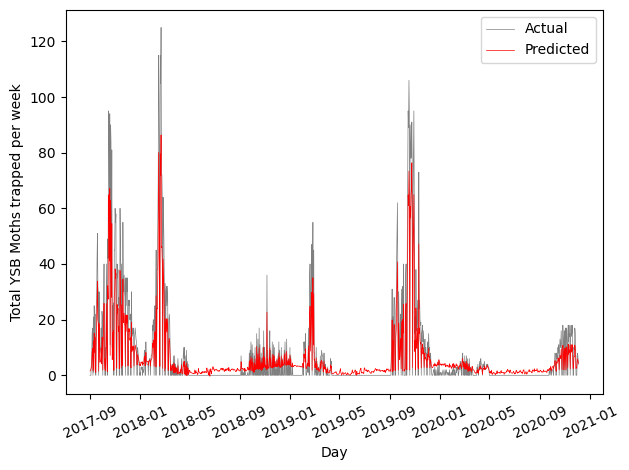

In [ ]:
# train plot
plt.plot(train_act_pred['Date'], train_act_pred['Actual'], color = 'grey', lw = 0.5)
plt.plot(train_act_pred['Date'], train_act_pred['Predicted'], color = 'red', lw = 0.5)
plt.ylabel('Total YSB Moths trapped per week')
plt.xlabel('Day')
plt.xticks(rotation = 25)
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.savefig('LSTM_train_actual_predicted.pdf', dpi=300)
plt.show()

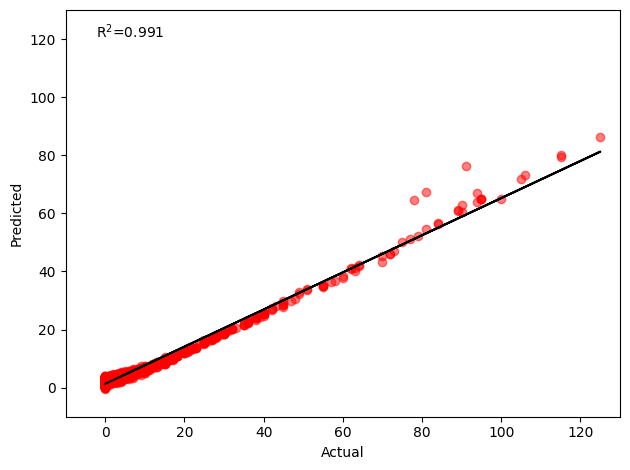

In [ ]:
# Scatter plot with regression line
plt.scatter(train_act_pred['Actual'],train_act_pred['Predicted'], color = 'red', alpha = 0.5)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(train_act_pred['Actual'], train_act_pred['Predicted'], 1)
#add linear regression line to scatterplot
plt.plot(train_act_pred['Actual'], m*train_act_pred['Actual']+b, color='black') #(x, m*x+b)
plt.xlim(-10,130)
plt.ylim(-10,130)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.tight_layout()
#plt.legend('R2: ' + str(r2_score(train_act_pred['Actual'], train_act_pred['Predicted'])))
rvalue = stats.linregress(train_act_pred['Actual'],train_act_pred['Predicted'])
plt.annotate("R$^2$=%.3f"%(rvalue.rvalue),xy=(0.15,0.9),xycoords='figure fraction')
plt.savefig('LSTM_train_actual_scatter_plot.pdf', dpi=300)
plt.show()

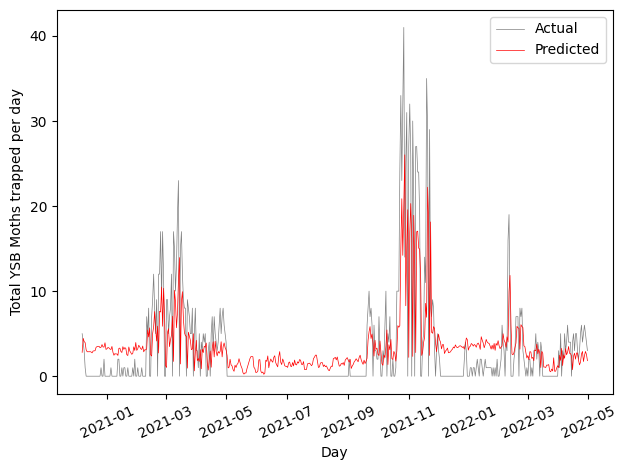

In [ ]:
# test plot
plt.plot(test_act_pred['Date'], test_act_pred['Actual'], color = 'grey', lw = 0.5)
plt.plot(test_act_pred['Date'], test_act_pred['Predicted'], color = 'red', lw = 0.5)
plt.ylabel('Total YSB Moths trapped per day')
plt.xlabel('Day')
plt.xticks(rotation = 25)
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.savefig('LSTM_test_actual_predicted.pdf', dpi=300)
plt.show()

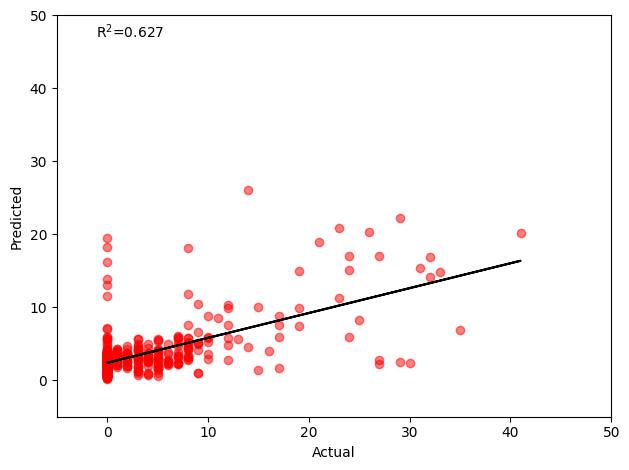

In [ ]:
# Scatter plot with regression line
plt.scatter(test_act_pred['Actual'],test_act_pred['Predicted'], color = 'red', alpha = 0.5)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(test_act_pred['Actual'], test_act_pred['Predicted'], 1)
#add linear regression line to scatterplot
plt.plot(test_act_pred['Actual'], m*test_act_pred['Actual']+b, color='black') #(x, m*x+b)
plt.xlim(-5,50)
plt.ylim(-5,50)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.tight_layout()
rvalue = stats.linregress(test_act_pred['Actual'],test_act_pred['Predicted'])
plt.annotate("R$^2$=%.3f"%(rvalue.rvalue),xy=(0.15,0.9),xycoords='figure fraction')
plt.savefig('LSTM_test_actual_scatter_plot.pdf', dpi=300)
plt.show()